In [186]:
# import the necessary packages
from imutils import paths
import cv2
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil

# Using OpenCV

#### Using Laplacian
- the goal of this operators is to measure the
 amount of edges present in images, through the
 second derivative or Laplacian
 
- You simply take a single channel of an image (presumably grayscale) and convolve it with the following 3 x 3     kernel 

- And then take the variance (i.e. standard deviation squared) of the response.

- If the variance falls below a pre-defined threshold, then the image is considered blurry; otherwise, the image is not blurry.

- To find Predefined Threshold I am checking what is the best threshold by trying various thresholds and analyzing them. You can find the details below
##### Refrence - https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

In [311]:
# Fixing The Image Size (Making all Images of Same Size)
def fix_image_size(image, expected_pixels=2E6):
    ratio = float(expected_pixels) / float(image.shape[0] * image.shape[1])
    return cv2.resize(image, (0, 0), fx=ratio, fy=ratio)

# Estimating Blurr With Laplacian
def estimate_blur(image, threshold=200):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur_map = cv2.Laplacian(image, cv2.CV_64F)
    score = np.var(blur_map)
    return blur_map, score, bool(score < threshold)

# Function to tell whether the image is blur or not
def Process(image,threshold):
    image = cv2.imread(image)
    image = fix_image_size(image)
    blurmap,score,b = estimate_blur(image,threshold)
#     print('Score : ' + str(score))
#     print('Blur : ' + str(b))
    return b

In [313]:
Training_file = './TrainingSet/'
Images = []
filenames = []
for filename in os.listdir(Training_file):
    lis = []
    print(filename)
    filenames.append(filename)
    for image in os.listdir(Training_file+filename):
        lis.append(Training_file+filename+'/'+image)
    Images.append(lis)
    print('Done : ' + str(filename))

Naturally-Blurred
Done : Naturally-Blurred
Artificially-Blurred
Done : Artificially-Blurred
NewDigitalBlur
Done : NewDigitalBlur
Undistorted
Done : Undistorted


In [314]:
filenames

['Naturally-Blurred', 'Artificially-Blurred', 'NewDigitalBlur', 'Undistorted']

In [315]:
len(Images[0])

220

In [320]:
accuracies = [] # List to store accuracies(Overall Accuracy)
thresholds = []  # List to store thresholds
threshold = 100 # Initial Threshhold

while threshold < 1200: # Loop until threshhold < 1200
    
    total = len(Images[0]) + len(Images[1]) + len(Images[2]) # Total number of Images
    total_Count = 0  # Initializing Total Count = 0 (Variable which will tell how much predictions are correct)
    for i in range(0,3): # Loop (0,1,2,3)
        print('------------------------')
        print 'File Name : ' + filenames[i]
        print('ThreshHold : ' + str(threshold))
        print '\n'
        count = 0
        Total = len(Images[i])
        for i in Images[i]:
            b = Process(i,threshold) # Calling Process Function Which will tell whether the image is blur or not
            if b: # if b is true
                count = count + 1  # increment the counter
        total_Count = total_Count + count
        print('Count : ' + str(count))
        print('Total : ' + str(Total))
        acc = int((float(count)/float(Total))*100) # Accuracy of prediction corresponding to one folder
        print ('Accuracy : ' + str(acc))            
    Overral_Acu = int((float(total_Count)/float(total))*100) # Calculating Overall Accuracy
    accuracies.append(Overral_Acu) # Appending accuracy(Overall)
    thresholds.append(threshold) # Appending Threshold
    print('------------------>Overall Accuracy<--------------- : ' + str(Overral_Acu))    
    threshold = threshold + 200 # incrementing threshold by 200

------------------------
File Name : Naturally-Blurred
ThreshHold : 100


Count : 69
Total : 220
Accuracy : 31
------------------------
File Name : Artificially-Blurred
ThreshHold : 100


Count : 132
Total : 150
Accuracy : 88
------------------------
File Name : NewDigitalBlur
ThreshHold : 100


Count : 87
Total : 150
Accuracy : 57
------------------>Overall Accuracy<--------------- : 55
------------------------
File Name : Naturally-Blurred
ThreshHold : 300


Count : 132
Total : 220
Accuracy : 60
------------------------
File Name : Artificially-Blurred
ThreshHold : 300


Count : 148
Total : 150
Accuracy : 98
------------------------
File Name : NewDigitalBlur
ThreshHold : 300


Count : 139
Total : 150
Accuracy : 92
------------------>Overall Accuracy<--------------- : 80
------------------------
File Name : Naturally-Blurred
ThreshHold : 500


Count : 171
Total : 220
Accuracy : 77
------------------------
File Name : Artificially-Blurred
ThreshHold : 500


Count : 150
Total : 150
Acc

In [322]:
# Checking Overall Accuracy with corresponding threshold

for i in range(0,6):
    print ('Threshold : ' + str(thresholds[i]) + ' --> Accuracy : ' + str(accuracies[i]))

Threshold : 100 --> Accuracy : 55
Threshold : 300 --> Accuracy : 80
Threshold : 500 --> Accuracy : 90
Threshold : 700 --> Accuracy : 94
Threshold : 900 --> Accuracy : 95
Threshold : 1100 --> Accuracy : 97


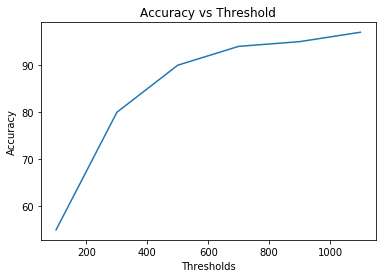

In [328]:
# Overall Accuracy

y = accuracies
x = thresholds
plt.plot(x,y)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')
plt.show()

## Evaluation Set

#### DigitalBlurSet

In [329]:
evalpath = './EvaluationSet'
DBS = pd.read_excel(evalpath + '/DigitalBlurSet.xlsx')

In [330]:
DBS.head()

,MyDigital Blur,Blur
0,DiskR10_1.jpg,1
1,DiskR10_10.jpg,1
2,DiskR10_11.jpg,1
3,DiskR10_12.jpg,1
4,DiskR10_13.jpg,1


In [333]:
DigitalBlurSet = evalpath + '/DigitalBlurSet/'
Total = len(DBS['MyDigital Blur'])

In [334]:
Total

480

In [335]:
## Getting Accuracy

count = 0
print ('Starting ---->')
for i in range(0,len(DBS['MyDigital Blur'])):
    filename = DBS['MyDigital Blur'][i]
    filepath = DigitalBlurSet + (filename.strip())
    b = Process(filepath, 700)
    if int(b)==DBS['Blur'][i]:
        count = count+1    
print('Accuracy : ' + str(int((float(count)/float(Total))*100)))        

Starting ---->
Accuracy : 93


#### NaturalBlurSet

In [337]:
evalpath = './EvaluationSet'
NBS = pd.read_excel(evalpath + '/NaturalBlurSet.xlsx')

In [338]:
NBS.head()

,Image Name,Blur Label
0,Original_1,-1
1,Original_2,-1
2,Original_3,-1
3,Original_4,1
4,Original_5,1


In [339]:
NaturalBlurSet = evalpath + '/NaturalBlurSet/'
Total = len(NBS['Image Name'])

In [340]:
Total

1000

In [341]:
## Getting Accuracy

count = 0
print ('Starting ---->')
for i in range(0,Total):
    filename = NBS['Image Name'][i]
    filepath = NaturalBlurSet + (filename.strip()) + '.jpg'
    b = Process(filepath, 700)
    if int(b)==NBS['Blur Label'][i]:
        count = count+1    
print('Accuracy : ' + str(int((float(count)/float(Total))*100)))        

Starting ---->
Accuracy : 41


# Using CNN

- Model Used -> LENET
- Batch Size -> 32
- Epochs -> 5 

### Process : 

- Making of a Training and Testing Dataset for
 - Naturally Blurred Dataset and undistorted
 - Digitally Blurred Dataset and undistorted
 - Combining All Blurred and undistorted <br/>
<br>
- Making of LENET Model<br>
<br>
- Compiling The Model<br>
<br>
- Making Of DataAugmented Data for Improving Accuracy<br>
<br>
- Training The Model<br>
<br>
- Evalutaiong The Model on Evalutaion Set <br/>
<br>
- To Improve Accuracy Further :
 - Try on Differet Models -> VGG16, Inception   
 - Increase The number of Epochs
 - More Data Augmentation

In [177]:
# Importing necessary libraries

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from keras.preprocessing import image
import pylab
import imageio
from keras.preprocessing.image import img_to_array
import cv2
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Activation

## First : Naturally Blurred VS Undistorted

In [182]:
# Making of Train and test Dataset
Training_file = './TrainingSet/'
 
Images = [] # Array for storing all folders images
filenames = [] # Array to store all folders name

for filename in os.listdir(Training_file): # Looping through Folders and getting file name one by one
    lis = []         # Temporary List to store path of one image inside one folder
    print(filename)
    filenames.append(filename) # Appending File name
    for image in os.listdir(Training_file+filename): # Getting Images from one folder 
        lis.append(Training_file+filename+'/'+image) # Appending image path to temporary list
    Images.append(lis)              # Appending Temporary List to the Image array
    print('Done : ' + str(filename))

Naturally-Blurred
Done : Naturally-Blurred
Artificially-Blurred
Done : Artificially-Blurred
CNN-Natural-Train
Done : CNN-Natural-Train
NewDigitalBlur
Done : NewDigitalBlur
CNN-Natural-Test
Done : CNN-Natural-Test
Undistorted
Done : Undistorted


In [190]:
len(Images[5])

630

In [189]:
# Making of Naturally Blurred CNN Dataset

#   -> Making 2 folders CNN-Train-Natural and CNN-Test-Natural
#   -> Making 2 folders inside each folder named Naturally-Blurred and undistorted
#   -> Splitting the data in the ration of 80% (Train) and 20%(Test) in each Naturally Blurred and undistorted

Training_file = './CNNTraining/'
if not os.path.exists(Training_file):
    os.makedirs(Training_file)   
def MakeNeutralDataset():
    CNNTrain = 'CNN-Train-Natural/'
    CNNTest = 'CNN-Test-Neutral/'
    direc =  Training_file + CNNTrain
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'Naturally-Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'Naturally-Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    

    print('----------->Start')
    for i in range(0,len(Images[0])):
        # Putting into Train 80%
        if i<(len(Images[0]) * 0.8):
            source = Images[0][i]
            dest = Training_file+CNNTrain+'Naturally-Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        else:
            source = Images[0][i]
            dest = Training_file+CNNTest+'Naturally-Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')  
    print('----------->Start')
    for i in range(0,len(Images[3])):
        # Putting into Train 80%
        if i<(len(Images[3]) * 0.8):
            source = Images[3][i]
            dest = Training_file+CNNTrain+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        else:
            source = Images[3][i]
            dest = Training_file+CNNTest+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')       

----------->Start
----------->Done


In [191]:
MakeNeutralDataset()    

----------->Start
----------->Done


In [202]:
# LENET Model
# Conv -> MaxPool -> Conv -> MaxPool -> Flatten -> FC -> FC

model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu")) 
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 20)        1520      
_________________________________________________________________
activation_21 (Activation)   (None, 64, 64, 20)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 50)        25050     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12800)             0         
__________

In [258]:
# Making training set and testing set
# Image Data Generator is used for Data Augmentation

Training_file = './CNNTraining'

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(Training_file+'/CNN-Train-Natural',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(Training_file+'/CNN-Test-Neutral/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 680 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [195]:
print(680/32) # Steps per Epoch
print(170/32) # Validation Steps

21
5


In [259]:
#Training Model
model.fit_generator(training_set,
                         steps_per_epoch = 21,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 5)
                         
model.save('modelLenet2.h5') # Saving Model  

Epoch 1/5
21/21 [==============================] - 117s 6s/step - loss: 2.3426 - acc: 0.7006 - val_loss: 0.5900 - val_acc: 0.7562
Epoch 2/5
21/21 [==============================] - 134s 6s/step - loss: 0.5667 - acc: 0.7368 - val_loss: 0.6004 - val_acc: 0.6957
Epoch 3/5
21/21 [==============================] - 126s 6s/step - loss: 0.4991 - acc: 0.7604 - val_loss: 0.4469 - val_acc: 0.7971
Epoch 4/5
21/21 [==============================] - 106s 5s/step - loss: 0.5244 - acc: 0.7647 - val_loss: 0.5468 - val_acc: 0.7609
Epoch 5/5
21/21 [==============================] - 145s 7s/step - loss: 0.4600 - acc: 0.7991 - val_loss: 0.5074 - val_acc: 0.7319


In [168]:
# Loading Model
model  = load_model('modelLenet2.h5')

In [288]:
# Function for Prediction

# -> Reading the image from opencv
# -> Resizing into (64,64)
# -> Rescaling
# -> Converting into Array
# -> Expanding dimensions
# -> Getting the result of prediction and index of class
def predict(image):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(image)
    image = cv2.resize(image, (64, 64))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)[0]
    idx = np.argmax(result)
    if(idx == 0):
        return 1
    else:
        return -1

In [289]:
# Checking which index belongs to which class
test_set.class_indices

{'Naturally-Blurred': 0, 'undistorted': 1}

In [290]:
# Evaluating the model

evalpath = './EvaluationSet'
NBS = pd.read_excel(evalpath + '/NaturalBlurSet.xlsx')
NaturalBlurSet = evalpath + '/NaturalBlurSet/'
Total = len(NBS['Image Name']) # Total number of rows

In [291]:
# Getting the Accuracy
count = 0
print ('Starting ---->')
for i in range(0,Total):
    filename = NBS['Image Name'][i]
    filepath = NaturalBlurSet + (filename.strip()) + '.jpg'
    b = predict(filepath)
    if b==NBS['Blur Label'][i]:
        count = count+1    
print('Accuracy : ' + str(int((float(count)/float(Total))*100)))        

Starting ---->
Accuracy : 61


## Digitally Blurred Vs Undistorted

In [293]:
# Making of Digitally Blurred CNN Dataset

#   -> Making 2 folders CNN-Train-Digital and CNN-Test-Digital
#   -> Making 2 folders inside each folder named Digital-Blurred and undistorted
#   -> Splitting the data in the ration of 80% (Train) and 20%(Test) in each Digital Blurred and undistorted

Training_file = './CNNTraining/'
if not os.path.exists(Training_file):
    os.makedirs(Training_file)   
def MakeDigitalDataset():
    CNNTrain = 'CNN-Train-Digital/'
    CNNTest = 'CNN-Test-Digital/'
    direc =  Training_file + CNNTrain
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'Digital-Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'Digital-Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    

    print('----------->Start')
    for i in range(0,len(Images[0])):
        # Putting into Train 80%
        if i<(len(Images[1]) * 0.8):
            source = Images[0][i]
            dest = Training_file+CNNTrain+'Digital-Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        else:
            source = Images[0][i]
            dest = Training_file+CNNTest+'Digital-Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')  
    print('----------->Start')
    for i in range(0,len(Images[5])):
        # Putting into Train 80%
        if i<(len(Images[5]) * 0.8):
            source = Images[5][i]
            dest = Training_file+CNNTrain+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        else:
            source = Images[5][i]
            dest = Training_file+CNNTest+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')    

In [294]:
MakeDigitalDataset()

----------->Start
----------->Done
----------->Start
----------->Done


In [295]:
# Same LENET Model as Above

model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu")) 
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 20)        1520      
_________________________________________________________________
activation_25 (Activation)   (None, 64, 64, 20)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 50)        25050     
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12800)             0         
__________

In [296]:
# Making training set and testing set
# Image Data Generator is used for Data Augmentation

Training_file = './CNNTraining'

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(Training_file + '/CNN-Train-Digital',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(Training_file + '/CNN-Test-Digital/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.
Found 226 images belonging to 2 classes.


In [297]:
print(624/32) # Steps per Epoch
print (226/32) # Validation Steps

19
7


In [305]:
#Training Model
model.fit_generator(training_set,
                         steps_per_epoch = 19,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 7)
                         
model.save('modelLenetDigital.h5') # Saving The Model  

Epoch 1/5
19/19 [==============================] - 114s 6s/step - loss: 0.3403 - acc: 0.8702 - val_loss: 0.7463 - val_acc: 0.6429
Epoch 2/5
19/19 [==============================] - 131s 7s/step - loss: 0.3194 - acc: 0.8848 - val_loss: 0.6643 - val_acc: 0.6495
Epoch 3/5
19/19 [==============================] - 122s 6s/step - loss: 0.2380 - acc: 0.9128 - val_loss: 0.9406 - val_acc: 0.6753
Epoch 4/5
19/19 [==============================] - 115s 6s/step - loss: 0.2344 - acc: 0.9242 - val_loss: 1.3240 - val_acc: 0.6186
Epoch 5/5
19/19 [==============================] - 113s 6s/step - loss: 0.1518 - acc: 0.9473 - val_loss: 0.9820 - val_acc: 0.5722


In [306]:
def predict(image):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(image)
    image = cv2.resize(image, (64, 64))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)[0]
    idx = np.argmax(result)
    if(idx == 0):
        return 1
    else:
        return -1

In [307]:
# Getting idx corresponding to classes
test_set.class_indices

{'Digital-Blurred': 0, 'undistorted': 1}

In [308]:
# Evaluating the Model
evalpath = './EvaluationSet'
DBS = pd.read_excel(evalpath + '/DigitalBlurSet.xlsx')

In [309]:
DigitalBlurSet = evalpath + '/DigitalBlurSet/'
Total = len(DBS['MyDigital Blur']) # Total Number of rows

In [310]:
# Getting The Accuracy

count = 0
print ('Starting ---->')
for i in range(0,Total):
    filename = DBS['MyDigital Blur'][i]
    filepath = DigitalBlurSet + (filename.strip())
    b = predict(filepath)
    if b==DBS['Blur'][i]:
        count = count+1    
print('Accuracy : ' + str(int((float(count)/float(Total))*100)))        

Starting ---->
Accuracy : 18


## Digitally Blurred + Naturally Blurred VS Undistorted 

In [349]:
len(Images)

4

In [350]:
filenames

['Naturally-Blurred', 'Artificially-Blurred', 'NewDigitalBlur', 'Undistorted']

In [358]:
## Combining all Blurred and undistorted

# Making of Digitally Blurred CNN Dataset

#   -> Making 2 folders CNN-Train-Digital and CNN-Test-Digital
#   -> Making 2 folders inside each folder named Digital-Blurred and undistorted
#   -> Splitting the data in the ration of 80% (Train) and 20%(Test) in each Digital Blurred and undistorted

Training_file = './CNNTraining/'
if not os.path.exists(Training_file):
    os.makedirs(Training_file)    
def MakeAllDataset():
    CNNTrain = 'CNN-Train-All/'
    CNNTest = 'CNN-Test-All/'
    direc =  Training_file + CNNTrain
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTrain + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'undistorted'
    if not os.path.exists(direc):
        os.makedirs(direc)    
    direc =  Training_file + CNNTest + 'Blurred'
    if not os.path.exists(direc):
        os.makedirs(direc)    

    print('----------->Start')
    for i in range(0,len(Images[0])):
        # Putting into Train 80%
        if i<(len(Images[0]) * 0.8):
            source = Images[0][i]
            dest = Training_file+CNNTrain+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)            
        else:
            source = Images[0][i]
            dest = Training_file+CNNTest+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
            
    for i in range(0,len(Images[1])):
        # Putting into Train 80%
        if i<(len(Images[1]) * 0.8):
            source = Images[1][i]
            dest = Training_file+CNNTrain+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
            
        else:
            source = Images[1][i]
            dest = Training_file+CNNTest+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
            
            
    for i in range(0,len(Images[2])):
        # Putting into Train 80%
        if i<(len(Images[2]) * 0.8):
            source = Images[2][i]
            dest = Training_file+CNNTrain+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
            
        else:
            source = Images[2][i]
            dest = Training_file+CNNTest+'Blurred/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')  
    print('----------->Start')
    for i in range(0,len(Images[3])):
        # Putting into Train 80%
        if i<(len(Images[3]) * 0.8):
            source = Images[3][i]
            dest = Training_file+CNNTrain+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        else:
            source = Images[3][i]
            dest = Training_file+CNNTest+'undistorted/'+str(i)+'.jpg'
            shutil.copy(source,dest)
        
    print('----------->Done')   

In [360]:
MakeAllDataset()

----------->Start
----------->Done
----------->Start
----------->Done


In [361]:
# Same LENET Model as Above

model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(64, 64, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu")) 
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 64, 64, 20)        1520      
_________________________________________________________________
activation_29 (Activation)   (None, 64, 64, 20)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 50)        25050     
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12800)             0         
__________

In [362]:
# Making training set and testing set
# Image Data Generator is used for Data Augmentation

Training_file = './CNNTraining'

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(Training_file + '/CNN-Train-All',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(Training_file + '/CNN-Test-All/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 680 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [363]:
print(680/32) # Steps per Epoch
print (200/32) # Validation Steps

21
6


In [364]:
#Training Model
model.fit_generator(training_set,
                         steps_per_epoch = 21,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 6)
                         
model.save('modelLenetAll.h5') # Saving The Model  

Epoch 1/5
21/21 [==============================] - 183s 9s/step - loss: 0.6889 - acc: 0.6806 - val_loss: 0.6415 - val_acc: 0.6302
Epoch 2/5
21/21 [==============================] - 135s 6s/step - loss: 0.5448 - acc: 0.7394 - val_loss: 0.6319 - val_acc: 0.6429
Epoch 3/5
21/21 [==============================] - 135s 6s/step - loss: 0.5190 - acc: 0.7515 - val_loss: 0.7785 - val_acc: 0.6190
Epoch 4/5
21/21 [==============================] - 159s 8s/step - loss: 0.4870 - acc: 0.7398 - val_loss: 0.6258 - val_acc: 0.6190
Epoch 5/5
21/21 [==============================] - 113s 5s/step - loss: 0.4309 - acc: 0.7798 - val_loss: 0.8686 - val_acc: 0.6548


In [365]:
def predict(image):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(image)
    image = cv2.resize(image, (64, 64))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)[0]
    idx = np.argmax(result)
    if(idx == 0):
        return 1
    else:
        return -1

In [366]:
# Getting idx corresponding to classes
test_set.class_indices

{'Blurred': 0, 'undistorted': 1}

In [367]:
# Evaluating the Model
evalpath = './EvaluationSet'
DBS = pd.read_excel(evalpath + '/DigitalBlurSet.xlsx')
DigitalBlurSet = evalpath + '/DigitalBlurSet/'
Total = len(DBS['MyDigital Blur']) # Total Number of rows

evalpath = './EvaluationSet'
NBS = pd.read_excel(evalpath + '/NaturalBlurSet.xlsx')
NaturalBlurSet = evalpath + '/NaturalBlurSet/'
Total1 = len(NBS['Image Name']) # Total number of rows

In [368]:
# Getting The Digitally Blurred Accuracy
count = 0
print ('Starting ---->')
for i in range(0,Total):
    filename = DBS['MyDigital Blur'][i]
    filepath = DigitalBlurSet + (filename.strip())
    b = predict(filepath)
    if b==DBS['Blur'][i]:
        count = count+1    
print('Digitally Blurred Accuracy : ' + str(int((float(count)/float(Total))*100))) 

# Getting the Naturally Blurred Accuracy
count = 0
print ('Starting ---->')
for i in range(0,Total1):
    filename = NBS['Image Name'][i]
    filepath = NaturalBlurSet + (filename.strip()) + '.jpg'
    b = predict(filepath)
    if b==NBS['Blur Label'][i]:
        count = count+1    
print(' Naturally BlurredAccuracy : ' + str(int((float(count)/float(Total1))*100)))        

Starting ---->
Digitally Blurred Accuracy : 11
Starting ---->
 Naturally BlurredAccuracy : 59


# END